# Detector de plagio
### (LSTM con Diccionario y Array 3D concatenado)

En este trabajo se busca realizar un detector de plagio de código utilizando técnicas del Deep Learning


**Autores:**

*   Michelle Aylin Calzada Montes
*   Manolo Ramírez Pintor
*   Eduardo Rodríguez Gill

### Cada vez que se quiera trabajar, se tiene que correr esta celda para tener acceso a los archivos

In [ ]:
# Accesar a Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ir al directorio de los archivos
%cd "/content/drive/Shareddrives/AI/Reto"
!ls

Mounted at /content/drive
/content/drive/Shareddrives/AI/Reto
'Approach 1 - LSTM Hashes 32 bits.ipynb'
'Approach2 - LSTM con Diccionario personalizado.ipynb'
'Approach 3 - LSTM con Diccionario y Array 3D concatenado.ipynb'
'Approach 4 - LSTM 3D, 2 columnas.ipynb'
'Approach 5 - Clasificador con coseno del ángulo.ipynb'
'Approach 6 - Modelo con Capas Densas.ipynb'
 mi_tokenizer.zip
 Plagios_IA.zip
 version_2_tokenized_dicc.zip
 version_2_tokenized.zip


In [ ]:
# Eliminar todo por si queremos reiniciar
!rm -rf "/content/Plagios IA"

# Copiar zip de las carpetas al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/Plagios_IA.zip /content

# Nuevo - Copiar zip del codigo tokenizado al almacenamiento de colab
!cp -r /content/drive/Shareddrives/AI/Reto/version_2_tokenized_dicc.zip /content

In [ ]:
# Extraer zip de Plagios IA
%%capture
%cd /content
!unzip Plagios_IA.zip
!unzip version_2_tokenized_dicc.zip

In [ ]:
# Eliminar archivos distractores
!rm -rf sample_data
!rm Plagios_IA.zip

# **Ya no correr las siguientes celdas**
## Revisando la info que contiene conplag en sus tablas



In [ ]:
# Instalar code_tokenize
%%capture
!pip install code-tokenize

In [ ]:
# Ver info de conplag
import pandas as pd
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")
df_conplag_test = pd.read_csv("./Plagios IA/conplag/versions/test_pairs.csv")
df_conplag_train = pd.read_csv("./Plagios IA/conplag/versions/train_pairs.csv")

In [ ]:
# Head de labels conplag
df_conplag_labels

,sub1,sub2,problem,verdict
0,0fd5b95a,6490bbe8,19,0
1,464a03b8,ff1fc018,20,0
2,3e6def38,548ffb07,14,1
3,0b91922c,71a4f6d2,6,0
4,9291ca83,d6fb3b9e,15,0
...,...,...,...,...
906,11c2ab99,28c2d81a,8,1
907,550335a3,6d7d5dd7,4,0
908,558df7d4,d8654140,17,0
909,3088ca9c,6f393cfe,15,1


In [ ]:
# Quitar archivos si no lo hicimos bien
!rm -rf "Plagios IA/conplag/versions/version_2_tokenized"

## Este bloque de código toma todos los archivos de conplag y los tokeniza
* Los tokens se convierten a valores numéricos únicos con una función hash de 32 bits

In [ ]:
# Tokenización de código:
import code_tokenize as ctok
import os

path = "./Plagios IA/conplag/versions/version_2"
new_path = "./Plagios IA/conplag/versions/version_2_tokenized"
folders = [x[0] for x in os.walk(path)]
todos_los_archivos = []

for folder in folders:
    files = os.listdir(folder)
    new_folder = folder.replace(path, new_path) # replace the original path with the new one
    if not os.path.exists(new_folder): # check if the folder exists
        os.mkdir(new_folder) # create the folder only if it doesn't exist
        for file in files:
            file_path = os.path.join(folder, file)
            if os.path.isdir(file_path): # check if the file is actually a subfolder
                subfiles = os.listdir(file_path) # get the files in the subfolder
                new_subfolder = os.path.join(new_folder, file) # create a new subfolder with the same name
                os.mkdir(new_subfolder)
                for subfile in subfiles: # loop over the files in the subfolder
                    subfile_path = os.path.join(file_path, subfile)
                    todos_los_archivos.append(subfile_path)
            else: # if the file is not a subfolder, proceed as before
                with open(file_path, "r") as f:
                    content = f.read()
                todos_los_archivos.append(subfile_path)

len(todos_los_archivos)

1822

In [ ]:
# Quitar carpetas
!rm -rf "Plagios IA/conplag/versions/version_2_tokenized"

In [ ]:
# Instalar tokenizers para hacer un diccionario
%%capture
!pip install tokenizers

In [ ]:
# Crear directorio para el diccionario
!mkdir mi_tokenizer

In [ ]:
# Importar libreria del diccionario
from tokenizers import CharBPETokenizer

# Crear un tokenizer vacío
tokenizer = CharBPETokenizer()
# Entrenar el tokenizer con un conjunto de archivos de código (por ejemplo, en C++)
tokenizer.train(files=todos_los_archivos, vocab_size=0)
# Guardar el tokenizer y su vocabulario
tokenizer.save_model("./mi_tokenizer")

# Cargar el tokenizer desde el disco a una variable
tokenizer = CharBPETokenizer("mi_tokenizer/vocab.json", "mi_tokenizer/merges.txt")

# Probar con algún código de Java
#tokens = tokenizer.encode("""    static class Pair implements Comparable<Pair> {
#        int id;
#        long sum=0;
#        public Pair(int id) {
#            this.id=id;
#        }""")
#print(tokens.ids) # [1, 2, 3, 4]
# print(tokens.tokens) # ["print", "(", "\"Hola\"", ")"]


In [ ]:
# Tokenizar un nuevo archivo de código

# Tokenización de código:
import code_tokenize as ctok
import os

path = "./Plagios IA/conplag/versions/version_2"
new_path = "./Plagios IA/conplag/versions/version_2_tokenized"
folders = [x[0] for x in os.walk(path)]
todos_los_archivos = []

for folder in folders:
    files = os.listdir(folder)
    new_folder = folder.replace(path, new_path) # replace the original path with the new one
    if not os.path.exists(new_folder): # check if the folder exists
        os.mkdir(new_folder) # create the folder only if it doesn't exist
        for file in files:
            file_path = os.path.join(folder, file)
            if os.path.isdir(file_path): # check if the file is actually a subfolder
                subfiles = os.listdir(file_path) # get the files in the subfolder
                new_subfolder = os.path.join(new_folder, file) # create a new subfolder with the same name
                os.mkdir(new_subfolder)
                for subfile in subfiles: # loop over the files in the subfolder
                    subfile_path = os.path.join(file_path, subfile)
                    todos_los_archivos.append(subfile_path)
                    with open(subfile_path, "r") as f:
                        content = f.read()
                    tokens = tokenizer.encode(content)
                    tokens_finales = str(tokens.ids).strip("[]")
                    new_subfile_path = os.path.join(new_subfolder, subfile[:-4] + "tok")
                    with open(new_subfile_path, "w") as f:
                        f.write("".join(tokens_finales))
            else: # if the file is not a subfolder, proceed as before
                with open(file_path, "r") as f:
                    content = f.read()
                #print(file_path)
                tokens = tokenizer.encode(content)
                new_file_path = os.path.join(new_folder, file[:-4] + "tok")
                todos_los_archivos.append(subfile_path)
                tokens_finales = str(tokens.ids).strip("[]")
                with open(new_file_path, "w") as f:
                    f.write("".join(tokens_finales))

## Estos (4) bloques de código almacena el código tokenizado a un zip y lo copia a Google Drive

In [ ]:
# Nos dirigimos a la carpeta para almacenaje
%cd "/content/Plagios IA/conplag/versions/"

/content/Plagios IA/conplag/versions


In [ ]:
# Lo zippeamos
%%capture
!zip -r /content/version_2_tokenized_dicc.zip "version_2_tokenized"

In [ ]:
# Nos regresamos a nuestra raiz para evitar accidentes
%cd /content

/content


In [ ]:
!cp version_2_tokenized_dicc.zip /content/drive/Shareddrives/AI/Reto # Copy to GDrive

In [ ]:
%%capture
!rm -rf version_2_tokenized

### Método de verificación (por si acaso)
Valida que el número de carpetas y de archivos sea el mismo entre la carpeta original y la carpeta tokenizada.

In [ ]:
# Verificar que todo está correcto en carpetas y archivos
import os

path1 = "./Plagios IA/conplag/versions/version_2"
path2 = "./Plagios IA/conplag/versions/version_2_tokenized"

folder_count1 = 0
file_count1 = 0
folder_count2 = 0
file_count2 = 0

for folder, subfolders, files in os.walk(path1):
    folder_count1 += 1 # increment the folder count
    file_count1 += len(files) # add the number of files in the folder

for folder, subfolders, files in os.walk(path2):
    folder_count2 += 1 # increment the folder count
    file_count2 += len(files) # add the number of files in the folder

print(f"Number of folders in {path1}: {folder_count1}")
print(f"Number of files in {path1}: {file_count1}")
print(f"Number of folders in {path2}: {folder_count2}")
print(f"Number of files in {path2}: {file_count2}")

Number of folders in ./Plagios IA/conplag/versions/version_2: 912
Number of files in ./Plagios IA/conplag/versions/version_2: 1822
Number of folders in ./Plagios IA/conplag/versions/version_2_tokenized: 912
Number of files in ./Plagios IA/conplag/versions/version_2_tokenized: 1822


# **Continuar ejecución de celdas a partir de aquí:**
## Creación de un dataframe para iniciar el entrenamiento

In [ ]:
# Retomar los paths de trabajo 
import os
path = "./Plagios IA/conplag/versions/version_2"
new_path = "./version_2_tokenized"

In [ ]:
import pandas as pd
# read the table
df_conplag_labels = pd.read_csv("./Plagios IA/conplag/versions/labels.csv")

# create a dictionary that maps each pair of files to their verdict
verdict_dict = {}
for index, row in df_conplag_labels.iterrows():
    sub1 = row["sub1"]
    sub2 = row["sub2"]
    verdict = row["verdict"]
    verdict_dict[f"{sub1}_{sub2}"] = verdict

#print(verdict_dict)

In [ ]:
import numpy as np
# create empty lists to store the inputs and targets
inputs = []
targets = []
lenght = 0
for subfolder in os.listdir(new_path):
    if subfolder in verdict_dict:
      verdict = verdict_dict[subfolder]
    else:
      continue
    file1 = len(np.loadtxt(os.path.join(new_path, subfolder, subfolder[:8] + ".tok"), dtype=int, delimiter=","))
    file2 = len(np.loadtxt(os.path.join(new_path, subfolder, subfolder[9:] + ".tok"), dtype=int, delimiter=","))
    if file1 > lenght:
      lenght = file1
    if file2 > lenght:
      lenght = file2


In [ ]:
import numpy as np
# create empty lists to store the inputs and targets
inputs = []
targets = []
# loop over the subfolders in the tokenized folder
for subfolder in os.listdir(new_path):
    # get the verdict from the dictionary
    if subfolder in verdict_dict:
      verdict = verdict_dict[subfolder]
      #print(verdict)
    else:
      continue
      #print("La clave no existe en el diccionario.")
    # load the two files and pad them with zeros
    #print(new_path)
    #print(subfolder)
    file1 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[:8] + ".tok"), dtype=int, delimiter=",")
    pad_width1 = lenght - len(file1)
    file1 = np.pad(file1, (0, pad_width1), mode='constant')
    file2 = np.loadtxt(os.path.join(new_path, subfolder, subfolder[9:] + ".tok"), dtype=int, delimiter=",")
    pad_width2 = lenght - len(file2)
    file2 = np.pad(file2, (0, pad_width2), mode='constant')
    # stack the arrays horizontally
    input = np.concatenate((file1, file2))
    # append the input and target to the lists
    inputs.append(input)
    targets.append(verdict)
# convert the lists to arrays
inputs = np.array(inputs)
targets = np.array(targets)

inputs.shape

(911, 33278)

## Preparación de datos

In [ ]:
# Almacenar la columna program en una variable X
X = np.array(inputs)

# Almacenar la columna verdict en una variable y
y = np.array(targets)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(728, 33278)

In [ ]:
X_train = X_train.reshape((-1, 1, 33278))
X_test = X_test.reshape((-1, 1, 33278))

In [ ]:
X_train.shape

(728, 1, 33278)

In [ ]:
X_train

array([[[72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0]],

       ...,

       [[72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0]],

       [[72, 76, 79, ...,  0,  0,  0]]])

# Modelo LSTM



In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()
model.add(LSTM(256, return_sequences=True, batch_input_shape=(X_train.shape)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(42, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10e-5), loss="binary_crossentropy", metrics=["acc"])


history = model.fit(X_train, y_train,
                    batch_size=182,
                    epochs = 100,
                    verbose = 1,
                    shuffle = False)

Epoch 1/100
4/4 [==============================] - 13s 55ms/step - loss: 0.6927 - acc: 0.6168
Epoch 2/100
4/4 [==============================] - 0s 58ms/step - loss: 0.6909 - acc: 0.7294
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 0.6893 - acc: 0.7294
Epoch 4/100
4/4 [==============================] - 0s 66ms/step - loss: 0.6877 - acc: 0.7294
Epoch 5/100
4/4 [==============================] - 0s 79ms/step - loss: 0.6860 - acc: 0.7294
Epoch 6/100
4/4 [==============================] - 0s 72ms/step - loss: 0.6844 - acc: 0.7294
Epoch 7/100
4/4 [==============================] - 0s 71ms/step - loss: 0.6827 - acc: 0.7294
Epoch 8/100
4/4 [==============================] - 0s 80ms/step - loss: 0.6808 - acc: 0.7294
Epoch 9/100
4/4 [==============================] - 0s 74ms/step - loss: 0.6788 - acc: 0.7294
Epoch 10/100
4/4 [==============================] - 0s 74ms/step - loss: 0.6765 - acc: 0.7294
Epoch 11/100
4/4 [==============================] - 0s 81ms/step - l

In [ ]:
# Contar el número de 1s y 0s en la columna veredicto
conteo = df_tokenizado['veredict'].value_counts()
conteo

0    659
1    251
Name: veredict, dtype: int64

In [ ]:
# Ok...
print(659+251)
print(659/910)

910
0.7241758241758242


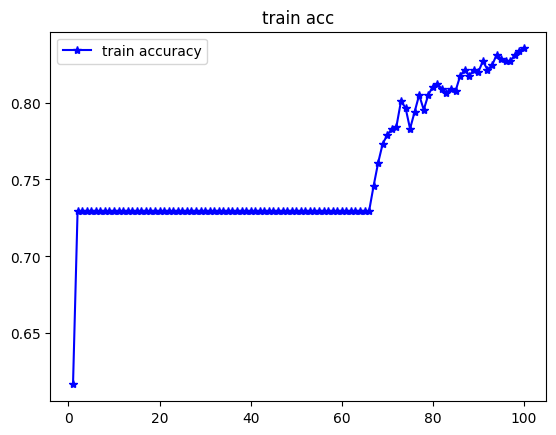

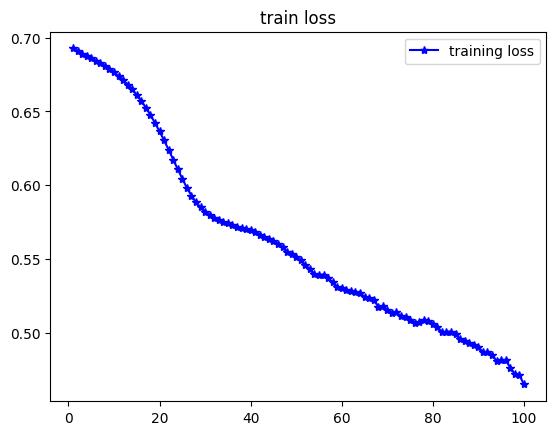

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b*-', label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b*-', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=10, steps = 25)
print('\ntest acc :\n', test_acc)

16/25 [==================>...........] - ETA: 0s - loss: 0.6299 - acc: 0.6938

25/25 [==============================] - 2s 10ms/step - loss: 0.5945 - acc: 0.7158

test acc :
 0.7158470153808594


In [ ]:
predictions = model.predict(X_test)
classes_x = predictions.T
classes_x = np.rint(classes_x)
classes_x

6/6 [==============================] - 2s 10ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

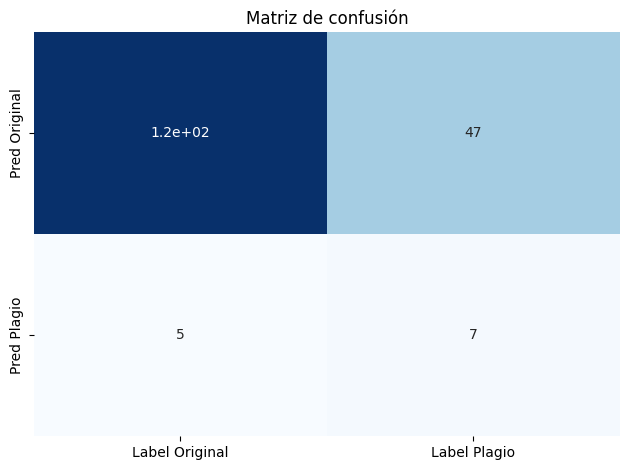

In [ ]:
Zimport seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

mat = confusion_matrix(classes_x[0], y_test)

df = pd.DataFrame(mat, index=['Pred Original', 'Pred Plagio'], columns=['Label Original', 'Label Plagio'])

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de confusión"), plt.tight_layout()
plt.show()